In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
Zee = pd.read_csv("http://opendata.cern.ch/record/545/files/Zee.csv")

In [3]:
Zee.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,45.4315,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,45.2954,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,45.9013,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096


In [4]:
def scatterHist(x, log = (False, False), xrange = None, yrange = None, xlabel = None, ylabel = None, title = None, **kwargs):
    n, bins = np.histogram(x, 300, range = xrange)
    bins = np.array([(bins[i-1] + bins[i])/2 for i in range(1,len(bins))])
    plt.scatter(bins, n, s =20, marker = '+', **kwargs)
    
    if isinstance(log, tuple):
        if log[0]:
            plt.xscale('log')
        if log[1]:
            plt.yscale('log')
    else:
        if log:
            plt.yscale('log')
    if yrange:
        plt.ylim(*yrange)
    if xrange:
        plt.xlim(*xrange)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)


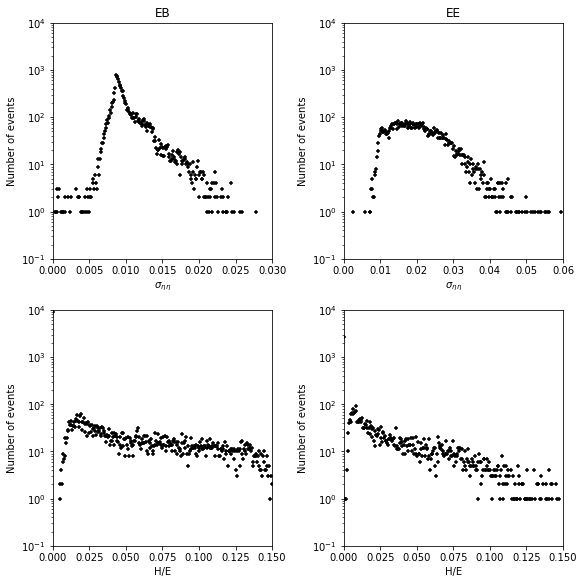

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), constrained_layout = True)

plt.sca(ax[0, 0])
scatterHist(pd.concat([Zee.loc[Zee['type1'] == 'EB']['sigmaEtaEta1'],
                       Zee.loc[Zee['type2'] == 'EB']['sigmaEtaEta2']]),
            log = True, yrange=(1e-1, 1e4), xrange = (0, 0.03), c = 'black',
            xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EB')

plt.sca(ax[0, 1])
scatterHist(pd.concat([Zee.loc[Zee['type1'] == 'EE']['sigmaEtaEta1'],
                       Zee.loc[Zee['type2'] == 'EE']['sigmaEtaEta2']]),
            log = True, yrange=(1e-1, 1e4), xrange = (0, 0.06), c = 'black',
            xlabel = '$\sigma$$_\eta$$_\eta$', ylabel = 'Number of events', title = 'EE')

plt.sca(ax[1, 0])
scatterHist(pd.concat([Zee.loc[Zee['type1'] == 'EB']['HoverE1'],
                       Zee.loc[Zee['type2'] == 'EB']['HoverE2']]),
            log = True, yrange=(1e-1, 1e4), xrange = (0, 0.15), c = 'black',
            xlabel = 'H/E', ylabel = 'Number of events')


plt.sca(ax[1, 1])
scatterHist(pd.concat([Zee.loc[Zee['type1'] == 'EE']['HoverE1'],
                       Zee.loc[Zee['type2'] == 'EE']['HoverE2']]),
            log = True, yrange=(1e-1, 1e4), xrange = (0, 0.15), c = 'black',
            xlabel = 'H/E', ylabel = 'Number of events')

plt.savefig('Histograms/ElectronIDhist.pdf', format = 'pdf')
plt.show()